In [12]:
import yaml
import matplotlib.pyplot
import numpy
import os

In [17]:
def get_occupancies():
    with open('occupancies.yml', 'r') as file:
        return yaml.load(file, Loader=yaml.Loader)

def get_metrices():
    with open('metrices.yml', 'r') as file:
        return yaml.load(file, Loader=yaml.Loader)

In [22]:
_occupancies = get_occupancies()
_metrices = get_metrices()

In [29]:
def normalize_object(obj, ref):
    result = {'ID': obj['ID']}
    for field in obj.keys():
        if field not in ['ID']:
            result[field] = obj[field] / ref[field]
    return result

def apply_normalization_with(metrices, occupancies):
    reference = occupancies[('occupancy', 'mean')]
    result = {}
    for (key, value), data in metrices.items():
        result[(key, value)] = {ID: normalize_object(obj, reference) for ID, obj in data.items()}
    return result

In [31]:
_rounds = apply_normalization_with(_metrices, _occupancies)

In [32]:
def prepare_round_record_for_plot(record: dict) -> tuple[str, numpy.array, numpy.array]:
    ID = record['ID']
    Xs, Ys = [], []
    for key in record.keys():
        if key not in ['ID']:
            Xs.append(key)
            Ys.append(record[key])
    return ID, numpy.array(Xs), numpy.array(Ys)

def prepare_round_records_for_plot(records: list) -> dict:
    result = {}
    for record in records.values():
        ID, Xs, Ys = prepare_round_record_for_plot(record)
        result[ID] = (ID, Xs, Ys)
    return result

In [33]:
def plot_diagram(round: dict, metric: str, value: str):
    metric_data = prepare_round_records_for_plot(round[(metric, value)])
    fig = matplotlib.pyplot.figure(figsize=(10, 5))
    for (ID, Xs, Ys) in metric_data.values():
        matplotlib.pyplot.plot(Xs, Ys, label=ID, marker='o')
    matplotlib.pyplot.title((metric, value))
    matplotlib.pyplot.legend()
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.show()

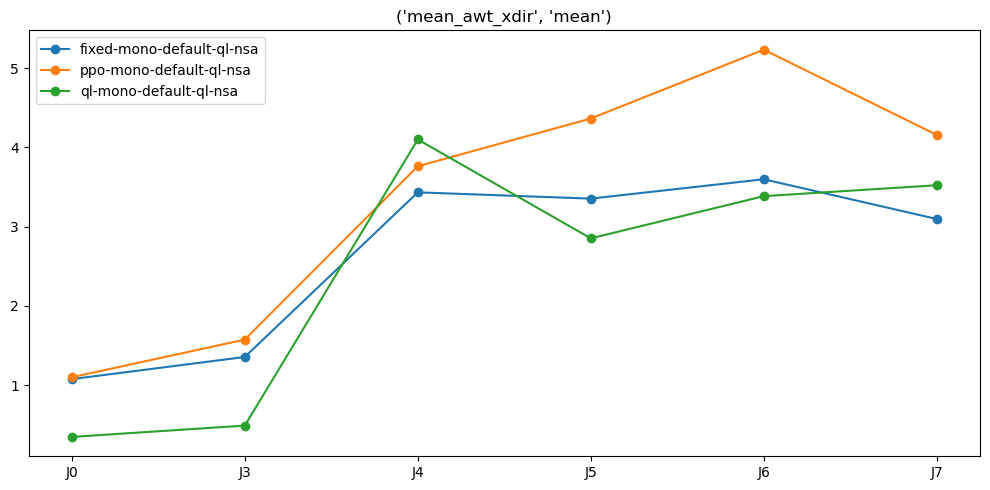

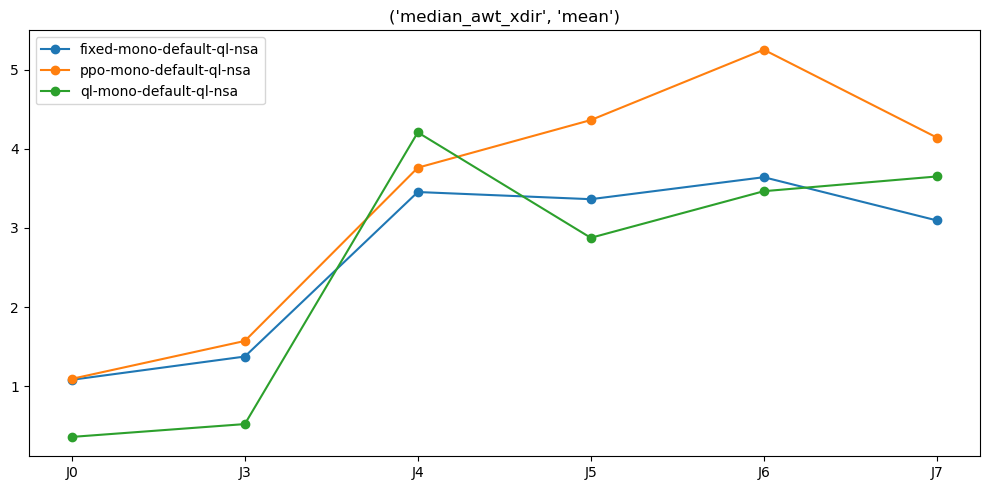

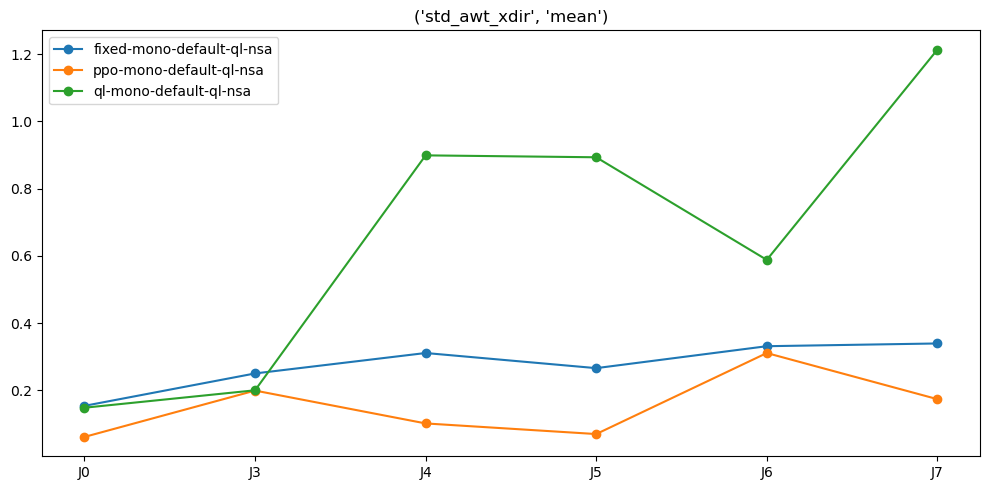

In [35]:
for (metric, value) in _rounds.keys():
    if value in ['mean']:
        plot_diagram(_rounds, metric, value)